In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, minmax_scale
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sys 
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.utils import np_utils
import tensorflow as tf
#from keras.regularizers import L1L2
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.utils import shuffle
#from keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from featurewiz import featurewiz
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.feature_selection import mutual_info_classif
np.random.seed(19680801)

Imported version = 0.1.70.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


In [2]:
data = pd.read_csv("gold_with_pivotal.csv")
data = data.drop(['-5','-4','-3','-2','-1','0','1','2','3','4','5','6','7','8','9'], axis = 1)
print(len(data))
data = data.dropna(subset=['approval_year'])
print(len(data))
data['approval_year'] = data['approval_year'].astype(int)
data['year'] = data['year'].astype(int)
data['offset_year'] = data['approval_year'] + data['years_from_prize']
off_cl = []
no_cl = 0
for ind in data.index:
    y = data['offset_year'][ind] - data['year'][ind]
    if y > 9 or y < -5:
        off_cl.append(-1)
        no_cl += 1
        print(data['drug_name'][ind])
    else:
        cl = data["cl_"+str(y)][ind]
        off_cl.append(cl)
data['offset_year_cluster'] = off_cl
print(no_cl)

385
370
AVYCAZ
Amjevita
Aubagio (teriflunomide)
Bavencio
Bavencio
Benznidazole
Benznidazole
Benznidazole
Bosulif (bosutinib)
Bosulif (bosutinib)
Bosulif (bosutinib)
Bosulif (bosutinib)
Brineura
Brineura
COTELLIC
Calquence
Cerdelga
ENTRESTO
Elelyso (TALIGLUCERASE ALFA)
Elelyso (TALIGLUCERASE ALFA)
Elelyso (TALIGLUCERASE ALFA)
Elelyso (TALIGLUCERASE ALFA)
Emflaza
Emflaza
Emflaza
Emflaza
Emflaza
Emflaza
Emflaza
Emflaza
Emflaza
Emflaza
Emflaza
Emflaza
Emflaza
Emflaza
Emflaza
Emflaza
Emflaza
Erelzi
Erivedge (vismodegib)
Farxiga
Farxiga
GENVOYA
GENVOYA
GENVOYA
GENVOYA
GENVOYA
GENVOYA
GENVOYA
GENVOYA
GENVOYA
GENVOYA
GENVOYA
GENVOYA
GENVOYA
Harvoni
Inlyta (axitinib)
Lynparza
Macrilen
Mavyret
Mavyret
Mavyret
Mavyret
Otezla
Otezla
Otezla
Otezla
Ozempic
Parsabiv
Parsabiv
Parsabiv
Parsabiv
Rhopressa
Rhopressa
Steglatro
Stivarga (Regorafenib)
Tymlos
VIBERZI
VIBERZI
VRAYLAR
Vosevi
Vyzulta
Vyzulta
Xadago
Xepi
YONDELIS
ZURAMPIC
ZURAMPIC
ZURAMPIC
Zaltrap
Zepatier
Zydelig
93


In [ ]:
print(data)

In [ ]:
data = pd.read_csv("gold_with_pivotal.csv")
#data = data[data['exemplar_year'] <= 2020]
data['year'] = data['year'].astype(int)
data['exemplar_year'] = data['exemplar_year'].astype(int)
anc = []
for ind in data.index:
    ex_yr = int(data['exemplar_year'][ind])
    ex_cl = int(data['exemplar_cl'][ind])
    y = ex_yr - data['year'][ind] - 1
    if y < -5:
        anc.append(-1)
        continue
    while y >= -5:
        #find the biggest_anc of ex_yr and ex_cl and see if it matches cl[y]. if so, insert the ex_yr and break. If not,
        #do y-1find the biggest_anc of the ex_yr-1 year.
        x = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/features_prediction_"+str(ex_yr)+".csv")
        x = x[x['cluster'] == ex_cl]
        x = x.to_numpy()
        banc = x[0][5]
        if banc == data["cl_"+str(y)][ind]:
            anc.append(ex_yr)
            break
        else:
            ex_yr = ex_yr - 1
            ex_cl = banc
            y -= 1
            if y < -5:
                anc.append(-1)
                break
data['anc'] = anc   

In [ ]:
data.to_csv("anc_draft.csv", index = False)

In [ ]:
data = pd.read_csv("gold_with_pivotal.csv")
prize_year = []
year_from_prize_earliest = []
prize_cluster_earliest = []
year_from_prize_latest = []
prize_cluster_latest = []
for ind in data.index:
    prize_year.append(data['year'][ind])
    yr_ear = data['year'][ind] - 5
    yr_lat = data['year'][ind] + 9
    p = 9
    if yr_lat > 2021:
        p = int(p - (yr_lat - 2021))
        yr_lat = 2021
    year_from_prize_earliest.append(yr_ear)
    year_from_prize_latest.append(yr_lat)
    prize_cluster_earliest.append(data["cl_-5"][ind])
    prize_cluster_latest.append(data["cl_"+str(p)][ind])
data['prize_year'] = prize_year
data['year_from_prize_earliest'] = year_from_prize_earliest
data['prize_cluster_earliest'] = prize_cluster_earliest
data['year_from_prize_latest'] = year_from_prize_latest
data['prize_cluster_latest'] = prize_cluster_latest
data = data.drop(['-5','-4','-3','-2','-1','0','1','2','3','4','5','6','7','8','9',
                 'cl_-5','cl_-4','cl_-3','cl_-2','cl_-1','cl_0','cl_1','cl_2','cl_3','cl_4','cl_5','cl_6','cl_7','cl_8','cl_9',
                 'exemplar_new_rank','offset','years_from_prize','nct_id'], axis = 1)

In [ ]:
data.to_csv("high_low_year_from_prize.csv", index = False)

In [ ]:
##prediction of offset year
def train(x_train):
    
    
  
    y_train = x_train['class']
    
    x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                           ], axis = 1)
    
    x_train[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_train[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])
    
    
    '''
    x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_train = x_train.drop(['cluster','year','n','pct_is_newish','pct_dusted_ccn','pct_dusted_rmcl','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)#$%
    #x_train = x_train.drop(['pct_of_biggest_anc_new','pct_of_secbiggest_anc_new','animal','pct_is_newish'], axis = 1)
    x_train = x_train.drop(['pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','cited_by_clin','class'], axis = 1)
    '''
    
    y_train = np.array(y_train)
 
    model = LogisticRegression(random_state=0, C = 1).fit(x_train,y_train) ##logistioc
    
    '''crossvalidation2(x_train, y_train)
    print(model.intercept_, model.coef_, model.score(x_train, y_train))'''
    scores = cross_val_score(model, x_train, y_train, cv=20,scoring = "f1")
    print("cv score ", scores.mean())
    return model

exem = pd.read_csv("offset_prediction.csv")
exem['year_from_prize_latest'] = exem['year_from_prize_latest'].astype(int)
exem['prize_cluster_latest'] = exem['prize_cluster_latest'].astype(int)
#exem = exem[exem['exemplar_year'] < 2021]
prediction = []
for ind in exem.index:
    yr = int(exem['year_from_prize_latest'][ind])
    cl = int(exem['prize_cluster_latest'][ind])
    
    x_train = pd.read_csv("data_84.csv")
    x_test = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/features_prediction_"+str(yr)+".csv")
    x_test = x_test.dropna(axis=0)
    
    x_test = x_test[x_test['n'] > 100]
    
    print("len of xtest ",len(x_test))
       
    copy_test = x_test.copy()
    x_test = x_test.drop(['prediction','cluster','year','n',
                               'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                               'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                               ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                               ], axis = 1)
    
    x_test[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_test[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])
    
    
    print("hdhdhd before ",len(x_train))
    x_train = x_train[x_train['year'] != yr]
    x_train = x_train[x_train['n'] > 100]

    
    #x_train = x_train[x_train['is_research_article'] > 0.75]
    print('len of xtrain ', len(x_train))

    model = train(x_train)
    
    pred = model.predict(x_test)
    print(pred.shape)
    #print(np.sum(pred))
    print("no of positive ",np.count_nonzero(pred == 1))
    

    
    predy = model.predict_proba(x_test)
    pred_test = []
    for i in range(predy.shape[0]):
        if predy[i][0] >= predy[i][1]:
            #pred_test.append(0.00)
            pred_test.append(predy[i][1])
        else:
            pred_test.append(predy[i][1])
    
    predy = pd.DataFrame(predy, columns = ['col_0','col_1'])
    predy = predy[predy['col_1'] > 0.75]
    #print("len of df ", len(df))
    print("len of predy ", len(predy))
    copy_test['pred_log'] = pred_test
    
    a = copy_test[copy_test['cluster'] == cl]
    if len(a) == 0:
        prediction.append(-1)
        continue
    a = a.to_numpy()
    prediction.append(a[0][np.shape(a)[1] - 1])
exem['later_pred'] = prediction
exem.to_csv("offset_prediction.csv", index = False)

In [12]:
data = pd.read_csv("gold_with_pivotal.csv")
print(data.dtypes)
#data = data.head(10)
L = []
for ind in data.index:
    cl = int(data['exemplar_cl'][ind])
    yr = int(data['exemplar_year'][ind])
    l = []
    if data['drug_name'][ind] != "Calquence":
        continue
    print("****")
    while(1):
        x = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/features_prediction_"+str(yr)+".csv")
        x = x[x['cluster'] == cl]
        if len(x) == 0:
            #L.append(l)
            break
        x = x.to_numpy()
        banc = x[0][5]
        yr -= 1
        cl = int(banc)
        print("yr ",yr," cl ",cl)
        d = data[data['exemplar_year'] == yr]
        if len(d) != 0:
            d = d[d['exemplar_cl'] == cl]
            if len(d) != 0:
                print("im here!")
                #print("len ",len(d))
                #d = d.to_numpy()
                #l.append(d[0][d.shape[1]-1])
                tt = d
                print(tt)
                d = d['drug_name'].unique()
                if len(d) > 1:
                    print("yes ", d)
                    
                l.extend([d, yr, cl," end "])
        if yr < 1978:
            break
    #l = list(set(l))
    L.append(l)
data['list'] = L
#data.to_csv("with_list4_today.csv", index = False)
    
            
                
    

pmid                   int64
year                 float64
-5                   float64
-4                   float64
-3                   float64
-2                   float64
-1                   float64
0                    float64
1                    float64
2                    float64
3                    float64
4                    float64
5                    float64
6                    float64
7                    float64
8                    float64
9                    float64
cl_-5                float64
cl_-4                float64
cl_-3                float64
cl_-2                float64
cl_-1                float64
cl_0                 float64
cl_1                 float64
cl_2                 float64
cl_3                 float64
cl_4                 float64
cl_5                 float64
cl_6                 float64
cl_7                 float64
cl_8                 float64
cl_9                 float64
exemplar_year        float64
exemplar_cl          float64
exemplar_new_r

ValueError: Length of values (1) does not match length of index (385)

In [6]:
data = pd.read_csv("gold_with_pivotal.csv")
print(data['exemplar_year'].min())
a = []
b = ["shusmi","mou","sadid","mou","shusmi","shusmi"]
b = list(set(b))
print(b)
b.extend(a)
print(b)

1982.0
['shusmi', 'mou', 'sadid']
['shusmi', 'mou', 'sadid']


In [4]:
data = pd.read_csv("gold_with_pivotal.csv")
print(data.dtypes)
yy=[]
pp=[]
xxl = []
#data = data.head(100)
for ind in data.index:
    p = []
    y = []
    xl = []
    
    
    xyr = data["year"][ind] - 5
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_-5"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_-4"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_-3"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_-2"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_-1"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
    
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_0"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_1"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_2"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
    
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_3"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_4"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_5"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
    
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_6"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_7"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_8"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    xyr = xyr + 1
    if xyr >= 1978 and xyr <= 2021: 
        xcl = data["cl_9"][ind]
        if np.isnan(xcl)==False:
            pred = pred_val(xyr,xcl)
            if pred != -1:
                p.append(pred)
                y.append(xyr)
                xl.append(xcl)
        
    yy.append(y)
    pp.append(p)
    xxl.append(xl)
data['yy'] = yy
data['pp'] = pp
data['xxl'] = xxl
#data.to_csv("full_trajectory_nov16.csv", index = False)
data.to_csv("full_trajectory_temporary.csv", index = False)
    

pmid                   int64
year                 float64
-5                   float64
-4                   float64
-3                   float64
-2                   float64
-1                   float64
0                    float64
1                    float64
2                    float64
3                    float64
4                    float64
5                    float64
6                    float64
7                    float64
8                    float64
9                    float64
cl_-5                float64
cl_-4                float64
cl_-3                float64
cl_-2                float64
cl_-1                float64
cl_0                 float64
cl_1                 float64
cl_2                 float64
cl_3                 float64
cl_4                 float64
cl_5                 float64
cl_6                 float64
cl_7                 float64
cl_8                 float64
cl_9                 float64
exemplar_year        float64
exemplar_cl          float64
exemplar_new_r

cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positi

cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of posit

cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  14615
hdhdhd before  292
len of xtrain  252
cv score  0.7300890775890775
(14615,)
no of positive  4340
len of predy  1211
len of xtest  15236
hdhdhd before  292
len of xtrain  256
cv score  0.7635156510156509
(15236,)
no of positi

cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positi

cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  14615
hdhdhd before  292
len of xtrain  252
cv score  0.7300890775890775
(14615,)
no of positive  4340
len of predy  1211
len of xtest  15236
hdhdhd before  292
len of xtrain  256
cv score  0.7635156510156509
(15236,)
no of positi

cv score  0.7654882617382617
(12545,)
no of positive  2851
len of predy  731
len of xtest  13090
hdhdhd before  292
len of xtrain  267
cv score  0.7677705627705628
(13090,)
no of positive  3527
len of predy  824
len of xtest  13582
hdhdhd before  292
len of xtrain  267
cv score  0.7635531135531134
(13582,)
no of positive  3661
len of predy  1182
len of xtest  14108
hdhdhd before  292
len of xtrain  261
cv score  0.7434465534465533
(14108,)
no of positive  3818
len of predy  791
len of xtest  14615
hdhdhd before  292
len of xtrain  252
cv score  0.7300890775890775
(14615,)
no of positive  4340
len of predy  1211
len of xtest  15236
hdhdhd before  292
len of xtrain  256
cv score  0.7635156510156509
(15236,)
no of positive  3738
len of predy  944
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive

cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positi

cv score  0.7481218781218779
(9261,)
no of positive  2302
len of predy  701
len of xtest  9510
hdhdhd before  292
len of xtrain  273
cv score  0.7644370580399991
(9510,)
no of positive  2916
len of predy  943
len of xtest  9903
hdhdhd before  292
len of xtrain  271
cv score  0.7341191406632583
(9903,)
no of positive  2336
len of predy  700
len of xtest  10331
hdhdhd before  292
len of xtrain  271
cv score  0.7538124375624375
(10331,)
no of positive  2962
len of predy  907
len of xtest  10713
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(10713,)
no of positive  2507
len of predy  703
len of xtest  11183
hdhdhd before  292
len of xtrain  273
cv score  0.7679303784450842
(11183,)
no of positive  2985
len of predy  961
len of xtest  11586
hdhdhd before  292
len of xtrain  273
cv score  0.7497667283696696
(11586,)
no of positive  2831
len of predy  872
len of xtest  12088
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(12088,)
no of positive  2829
l

cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of posit

cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  13090
hdhdhd before  292
len of xtrain  267
cv score  0.7677705627705628
(13090,)
no of positi

cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of posit

cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positi

cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  15236
hdhdhd before  292
len of xtrain  256
cv score  0.7635156510156509
(15236,)
no of positive  3738
len of predy  944
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positiv

cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positi

cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positi

cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positi

cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of posit

cv score  0.7650196372255194
(8301,)
no of positive  1812
len of predy  467
len of xtest  8620
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(8620,)
no of positive  1929
len of predy  493
len of xtest  8999
hdhdhd before  292
len of xtrain  273
cv score  0.7666106197723844
(8999,)
no of positive  2145
len of predy  610
len of xtest  9261
hdhdhd before  292
len of xtrain  273
cv score  0.7481218781218779
(9261,)
no of positive  2302
len of predy  701
len of xtest  9510
hdhdhd before  292
len of xtrain  273
cv score  0.7644370580399991
(9510,)
no of positive  2916
len of predy  943
len of xtest  9903
hdhdhd before  292
len of xtrain  271
cv score  0.7341191406632583
(9903,)
no of positive  2336
len of predy  700
len of xtest  10331
hdhdhd before  292
len of xtrain  271
cv score  0.7538124375624375
(10331,)
no of positive  2962
len of predy  907
len of xtest  6003
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(6003,)
no of positive  1212
len of pr

cv score  0.7650196372255194
(8301,)
no of positive  1812
len of predy  467
len of xtest  8620
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(8620,)
no of positive  1929
len of predy  493
len of xtest  8999
hdhdhd before  292
len of xtrain  273
cv score  0.7666106197723844
(8999,)
no of positive  2145
len of predy  610
len of xtest  9261
hdhdhd before  292
len of xtrain  273
cv score  0.7481218781218779
(9261,)
no of positive  2302
len of predy  701
len of xtest  9510
hdhdhd before  292
len of xtrain  273
cv score  0.7644370580399991
(9510,)
no of positive  2916
len of predy  943
len of xtest  4303
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(4303,)
no of positive  1262
len of predy  372
len of xtest  4522
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(4522,)
no of positive  1084
len of predy  248
len of xtest  4677
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(4677,)
no of positive  1089
len of pred

cv score  0.7650196372255194
(10713,)
no of positive  2507
len of predy  703
len of xtest  11183
hdhdhd before  292
len of xtrain  273
cv score  0.7679303784450842
(11183,)
no of positive  2985
len of predy  961
len of xtest  11586
hdhdhd before  292
len of xtrain  273
cv score  0.7497667283696696
(11586,)
no of positive  2831
len of predy  872
len of xtest  6609
hdhdhd before  292
len of xtrain  274
cv score  0.7426225245342892
(6609,)
no of positive  1521
len of predy  261
len of xtest  6819
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(6819,)
no of positive  1479
len of predy  411
len of xtest  7133
hdhdhd before  292
len of xtrain  273
cv score  0.7624367054514113
(7133,)
no of positive  1528
len of predy  460
len of xtest  7484
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(7484,)
no of positive  1678
len of predy  490
len of xtest  7753
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(7753,)
no of positive  1821
len of

cv score  0.7635531135531134
(13582,)
no of positive  3661
len of predy  1182
len of xtest  7982
hdhdhd before  292
len of xtrain  269
cv score  0.775791292041292
(7982,)
no of positive  2486
len of predy  770
len of xtest  8301
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(8301,)
no of positive  1812
len of predy  467
len of xtest  8620
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(8620,)
no of positive  1929
len of predy  493
len of xtest  8999
hdhdhd before  292
len of xtrain  273
cv score  0.7666106197723844
(8999,)
no of positive  2145
len of predy  610
len of xtest  9261
hdhdhd before  292
len of xtrain  273
cv score  0.7481218781218779
(9261,)
no of positive  2302
len of predy  701
len of xtest  9510
hdhdhd before  292
len of xtrain  273
cv score  0.7644370580399991
(9510,)
no of positive  2916
len of predy  943
len of xtest  9903
hdhdhd before  292
len of xtrain  271
cv score  0.7341191406632583
(9903,)
no of positive  2336
len of pre

cv score  0.7644370580399991
(9510,)
no of positive  2916
len of predy  943
len of xtest  9903
hdhdhd before  292
len of xtrain  271
cv score  0.7341191406632583
(9903,)
no of positive  2336
len of predy  700
len of xtest  10331
hdhdhd before  292
len of xtrain  271
cv score  0.7538124375624375
(10331,)
no of positive  2962
len of predy  907
len of xtest  10713
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(10713,)
no of positive  2507
len of predy  703
len of xtest  11183
hdhdhd before  292
len of xtrain  273
cv score  0.7679303784450842
(11183,)
no of positive  2985
len of predy  961
len of xtest  11586
hdhdhd before  292
len of xtrain  273
cv score  0.7497667283696696
(11586,)
no of positive  2831
len of predy  872
len of xtest  12088
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(12088,)
no of positive  2829
len of predy  766
len of xtest  12545
hdhdhd before  292
len of xtrain  269
cv score  0.7654882617382617
(12545,)
no of positive  2851

cv score  0.7650196372255194
(10713,)
no of positive  2507
len of predy  703
len of xtest  11183
hdhdhd before  292
len of xtrain  273
cv score  0.7679303784450842
(11183,)
no of positive  2985
len of predy  961
len of xtest  11586
hdhdhd before  292
len of xtrain  273
cv score  0.7497667283696696
(11586,)
no of positive  2831
len of predy  872
len of xtest  12088
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(12088,)
no of positive  2829
len of predy  766
len of xtest  12545
hdhdhd before  292
len of xtrain  269
cv score  0.7654882617382617
(12545,)
no of positive  2851
len of predy  731
len of xtest  13090
hdhdhd before  292
len of xtrain  267
cv score  0.7677705627705628
(13090,)
no of positive  3527
len of predy  824
len of xtest  13582
hdhdhd before  292
len of xtrain  267
cv score  0.7635531135531134
(13582,)
no of positive  3661
len of predy  1182
len of xtest  14108
hdhdhd before  292
len of xtrain  261
cv score  0.7434465534465533
(14108,)
no of positive  

cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  15236
hdhdhd before  292
len of xtrain  256
cv score  0.7635156510156509
(15236,)
no of positive  3738
len of predy  944
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positi

cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positi

cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positi

cv score  0.7635531135531134
(13582,)
no of positive  3661
len of predy  1182
len of xtest  14108
hdhdhd before  292
len of xtrain  261
cv score  0.7434465534465533
(14108,)
no of positive  3818
len of predy  791
len of xtest  14615
hdhdhd before  292
len of xtrain  252
cv score  0.7300890775890775
(14615,)
no of positive  4340
len of predy  1211
len of xtest  15236
hdhdhd before  292
len of xtrain  256
cv score  0.7635156510156509
(15236,)
no of positive  3738
len of predy  944
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positi

cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of posit

cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positi

cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  14615
hdhdhd before  292
len of xtrain  252
cv score  0.7300890775890775
(14615,)
no of positive  4340
len of predy  1211
len of xtest  15236
hdhdhd before  292
len of xtrain  256
cv score  0.7635156510156509
(15236,)
no of positive  3738
len of predy  944
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positi

cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positi

cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positi

cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of posit

cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  14615
hdhdhd before  292
len of xtrain  252
cv score  0.7300890775890775
(14615,)
no of positi

cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of posit

cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  14108
hdhdhd before  292
len of xtrain  261
cv score  0.7434465534465533
(14108,)
no of positive  3818
len of predy  791
len of xtest  14615
hdhdhd before  292
len of xtrain  252
cv score  0.7300890775890775
(14615,)
no of positive  4340
len of predy  1211
len of xtest  15236
hdhdhd before  292
len of xtrain  256
cv score  0.7635156510156509
(15236,)
no of positiv

cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positi

cv score  0.7635156510156509
(15236,)
no of positive  3738
len of predy  944
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positi

cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of posit

cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positi

cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of posit

cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positi

cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positi

cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positi

cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positi

cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of posit

cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of posit

cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of posit

cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of posit

cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  14108
hdhdhd before  292
len of xtrain  261
cv score  0.7434465534465533
(14108,)
no of posit

cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of posit

cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positi

cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  13582
hdhdhd before  292
len of xtrain  267
cv score  0.7635531135531134
(13582,)
no of positive  3661
len of predy  1182
len of xtest  14108
hdhdhd before  292
len of xtrain  261
cv score  0.7434465534465533
(14108,)
no of positive  3818
len of predy  791
len of xtest  14615
hdhdhd before  292
len of xtrain  252
cv score  0.7300890775890775
(14615,)
no of positive  4340
len of predy  1211
len of xtest  15236
hdhdhd before  292
len of xtrain  256
cv score  0.7635156510156509
(15236,)
no of positive  3738
len of predy  944
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positiv

len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtr

cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positi

cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positi

cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  14615
hdhdhd before  292
len of xtrain  252
cv score  0.7300890775890775
(14615,)
no of positive  4340
len of predy  1211
len of xtest  15236
hdhdhd before  292
len of xtrain  256
cv score  0.7635156510156509
(15236,)
no of positi

cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positi

cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of posit

cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  14615
hdhdhd before  292
len of xtrain  252
cv score  0.7300890775890775
(14615,)
no of positive  4340
len of predy  1211
len of xtest  15236
hdhdhd before  292
len of xtrain  256
cv score  0.7635156510156509
(15236,)
no of positive  3738
len of predy  944
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positi

cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positi

cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positi

cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of posit

cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  14108
hdhdhd before  292
len of xtrain  261
cv score  0.7434465534465533
(14108,)
no of positive  3818
len of predy  791
len of xtest  14615
hdhdhd before  292
len of xtrain  252
cv score  0.7300890775890775
(14615,)
no of positive  4340
len of predy  1211
len of xtest  15236
hdhdhd before  292
len of xtrain  256
cv score  0.7635156510156509
(15236,)
no of positive  3738
len of predy  944
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positiv

cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  12545
hdhdhd before  292
len of xtrain  269
cv score  0.7654882617382617
(12545,)
no of positive  2851
len of predy  731
len of xtest  13090
hdhdhd before  292
len of xtrain  267
cv score  0.7677705627705628
(13090,)
no of positive  3527
len of predy  824
len of xtest  13582
hdhdhd before  292
len of xtrain  267
cv score  0.7635531135531134
(13582,)
no of positive  3661
len of predy  1182
len of xtest  14108
hdhdhd before  292
len of xtrain  261
cv score  0.7434465534465533
(14108,)
no of positive  3818
len of predy  791
len of xtest  14615
hdhdhd before  292
len of xtrain  252
cv score  0.7300890775890775
(14615,)
no of positive  4340
len of predy  1211
len of xtest  15236
hdhdhd before  292
len of xtrain  256
cv score  0.7635156510156509
(15236,)
no of positive

cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  14615
hdhdhd before  292
len of xtrain  252
cv score  0.7300890775890775
(14615,)
no of positive  4340
len of predy  1211
len of xtest  15236
hdhdhd before  292
len of xtrain  256
cv score  0.7635156510156509
(15236,)
no of positive  3738
len of predy  944
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of posit

cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of posit

cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  14615
hdhdhd before  292
len of xtrain  252
cv score  0.7300890775890775
(14615,)
no of positive  4340
len of predy  1211
len of xtest  15236
hdhdhd before  292
len of xtrain  256
cv score  0.7635156510156509
(15236,)
no of positive  3738
len of predy  944
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positiv

len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  15236
hdhdhd before  292
len of xtrain  256
cv score  0.7635156510156509
(15236,)
no of positive  3738
len of predy  944
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd befo

len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtr

cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  14615
hdhdhd before  292
len of xtrain  252
cv score  0.7300890775890775
(14615,)
no of positive  4340
len of predy  1211
len of xtest  15236
hdhdhd before  292
len of xtrain  256
cv score  0.7635156510156509
(15236,)
no of positive  3738
len of predy  944
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positi

cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positi

cv score  0.7635156510156509
(15236,)
no of positive  3738
len of predy  944
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positi

cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of positive  5265
len of predy  1584
len of xtest  19886
hdhdhd before  292
len of xtrain  269
cv score  0.756806943056943
(19886,)
no of positive  5693
len of predy  1771
len of xtest  20517
hdhdhd before  292
len of xtrain  267
cv score  0.7599053397582809
(20517,)
no of positive  5494
len of predy  1574
len of xtest  21201
hdhdhd before  292
len of xtrain  267
cv score  0.7637957630604688
(21201,)
no of positive  4514
len of predy  1166
len of xtest  22230
hdhdhd before  292
len of xtrain  271
cv score  0.757469834087481
(22230,)
no of positive  6139
len of predy  1459
len of xtest  22359
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(22359,)
no of positive  5593
len of predy  1595
len of xtest  14108
hdhdhd before  292
len of xtrain  261
cv score  0.7434465534465533
(14108,)
no of positi

cv score  0.7300890775890775
(14615,)
no of positive  4340
len of predy  1211
len of xtest  15236
hdhdhd before  292
len of xtrain  256
cv score  0.7635156510156509
(15236,)
no of positive  3738
len of predy  944
len of xtest  15809
hdhdhd before  292
len of xtrain  240
cv score  0.7638761238761239
(15809,)
no of positive  4018
len of predy  1009
len of xtest  16449
hdhdhd before  292
len of xtrain  237
cv score  0.7516450216450214
(16449,)
no of positive  4174
len of predy  1032
len of xtest  17100
hdhdhd before  292
len of xtrain  236
cv score  0.7425485625485625
(17100,)
no of positive  4739
len of predy  1251
len of xtest  17754
hdhdhd before  292
len of xtrain  259
cv score  0.7662687312687313
(17754,)
no of positive  5000
len of predy  1545
len of xtest  18492
hdhdhd before  292
len of xtrain  267
cv score  0.7750679957297604
(18492,)
no of positive  5453
len of predy  1781
len of xtest  19130
hdhdhd before  292
len of xtrain  271
cv score  0.7557883129941954
(19130,)
no of posit

In [8]:
print(len(data))
data.to_csv("full_trajectory_prediction2.csv", index = False)

100


In [2]:
##prediction of offset year
def train(x_train):
    
    
  
    y_train = x_train['class']
    
    x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                           ], axis = 1)
    
    x_train[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_train[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])
    
    
    '''
    x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_train = x_train.drop(['cluster','year','n','pct_is_newish','pct_dusted_ccn','pct_dusted_rmcl','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)#$%
    #x_train = x_train.drop(['pct_of_biggest_anc_new','pct_of_secbiggest_anc_new','animal','pct_is_newish'], axis = 1)
    x_train = x_train.drop(['pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','cited_by_clin','class'], axis = 1)
    '''
    
    y_train = np.array(y_train)
 
    model = LogisticRegression(random_state=0, C = 1).fit(x_train,y_train) ##logistioc
    
    '''crossvalidation2(x_train, y_train)
    print(model.intercept_, model.coef_, model.score(x_train, y_train))'''
    scores = cross_val_score(model, x_train, y_train, cv=20,scoring = "f1")
    print("cv score ", scores.mean())
    return model

def pred_val(yr,cl):  
    yr = int(yr)
    cl = int(cl)
    x_train = pd.read_csv("data_84.csv")
    x_test = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/features_prediction_"+str(yr)+".csv")
    x_test = x_test.dropna(axis=0)
    
    x_test = x_test[x_test['n'] > 100]
    
    print("len of xtest ",len(x_test))
       
    copy_test = x_test.copy()
    x_test = x_test.drop(['prediction','cluster','year','n',
                               'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                               'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                               ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                               ], axis = 1)
    
    x_test[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_test[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])
    
    
    print("hdhdhd before ",len(x_train))
    x_train = x_train[x_train['year'] != yr]
    x_train = x_train[x_train['n'] > 100]

    
    #x_train = x_train[x_train['is_research_article'] > 0.75]
    print('len of xtrain ', len(x_train))

    model = train(x_train)
    
    pred = model.predict(x_test)
    print(pred.shape)
    #print(np.sum(pred))
    print("no of positive ",np.count_nonzero(pred == 1))
    

    
    predy = model.predict_proba(x_test)
    pred_test = []
    for i in range(predy.shape[0]):
        if predy[i][0] >= predy[i][1]:
            #pred_test.append(0.00)
            pred_test.append(predy[i][1])
        else:
            pred_test.append(predy[i][1])
    
    predy = pd.DataFrame(predy, columns = ['col_0','col_1'])
    predy = predy[predy['col_1'] > 0.75]
    #print("len of df ", len(df))
    print("len of predy ", len(predy))
    copy_test['pred_log'] = pred_test
    
    
    av = copy_test['pred_log'].sum()
    
    a = copy_test[copy_test['cluster'] == cl]
    if len(a) == 0:
        return -1
    a = a.to_numpy()
    return (a[0][np.shape(a)[1] - 1])

In [2]:
##dataset generating for regression of random samples
def train(x_train):
    
    
  
    y_train = x_train['class']
    
    x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                           ], axis = 1)
    
    x_train[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_train[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])
    
    
    '''
    x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_train = x_train.drop(['cluster','year','n','pct_is_newish','pct_dusted_ccn','pct_dusted_rmcl','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)#$%
    #x_train = x_train.drop(['pct_of_biggest_anc_new','pct_of_secbiggest_anc_new','animal','pct_is_newish'], axis = 1)
    x_train = x_train.drop(['pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','cited_by_clin','class'], axis = 1)
    '''
    
    y_train = np.array(y_train)
 
    model = LogisticRegression(random_state=0, C = 1).fit(x_train,y_train) ##logistioc
    
    '''crossvalidation2(x_train, y_train)
    print(model.intercept_, model.coef_, model.score(x_train, y_train))'''
    scores = cross_val_score(model, x_train, y_train, cv=20,scoring = "f1")
    print("cv score ", scores.mean())
    return model

def make_pred(yr):  
    yr = int(yr)
    x_train = pd.read_csv("data_84.csv")
    x_test = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/features_prediction_"+str(yr)+".csv")
    x_test = x_test.dropna(axis=0)
    
    x_test = x_test[x_test['n'] > 100]
    
    '''x_test = x_test[x_test['rcr_hi'] >= 2.00]
    x_test = x_test[x_test['cited_by_clin'] >= 0.080]
    x_test = x_test[x_test['animal'] >= 0.01]

    x_test = x_test[x_test['molecular_cellular'] >= 0.020] ##this one, with C = 1
    x_test = x_test[x_test['human'] >= 0.20]'''
    
    print("len of xtest ",len(x_test))
       
    copy_test = x_test.copy()
    x_test = x_test.drop(['prediction','cluster','year','n',
                               'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                               'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                               ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                               ], axis = 1)
    
    x_test[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_test[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])
    
    
    print("hdhdhd before ",len(x_train))
    x_train = x_train[x_train['year'] != yr]
    x_train = x_train[x_train['n'] > 100]

    
    #x_train = x_train[x_train['is_research_article'] > 0.75]
    print('len of xtrain ', len(x_train))

    model = train(x_train)
    
    pred = model.predict(x_test)
    print(pred.shape)
    #print(np.sum(pred))
    print("no of positive ",np.count_nonzero(pred == 1))
    

    
    predy = model.predict_proba(x_test)
    pred_test = []
    for i in range(predy.shape[0]):
        if predy[i][0] >= predy[i][1]:
            #pred_test.append(0.00)
            pred_test.append(predy[i][1])
        else:
            pred_test.append(predy[i][1])
    
    predy = pd.DataFrame(predy, columns = ['col_0','col_1'])
    predy = predy[predy['col_1'] > 0.75]
    #print("len of df ", len(df))
    print("len of predy ", len(predy))
    copy_test['pred_log'] = pred_test
    samp = copy_test.sample(n=36, replace = False)
    return samp
    
yr = 1990
df = make_pred(yr)
yr += 1
while yr <= 2020:
    x = make_pred(yr)
    df = df.append(x, ignore_index = True)
    yr += 1


len of xtest  7133
hdhdhd before  292
len of xtrain  273
cv score  0.7624367054514113
(7133,)
no of positive  1528
len of predy  460
len of xtest  7484
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(7484,)
no of positive  1678
len of predy  490
len of xtest  7753
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(7753,)
no of positive  1821
len of predy  537
len of xtest  7982
hdhdhd before  292
len of xtrain  269
cv score  0.775791292041292
(7982,)
no of positive  2486
len of predy  770
len of xtest  8301
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(8301,)
no of positive  1812
len of predy  467
len of xtest  8620
hdhdhd before  292
len of xtrain  275
cv score  0.7650196372255194
(8620,)
no of positive  1929
len of predy  493
len of xtest  8999
hdhdhd before  292
len of xtrain  273
cv score  0.7666106197723844
(8999,)
no of positive  2145
len of predy  610
len of xtest  9261
hdhdhd before  292
len of xtrain  273
cv score  0.7

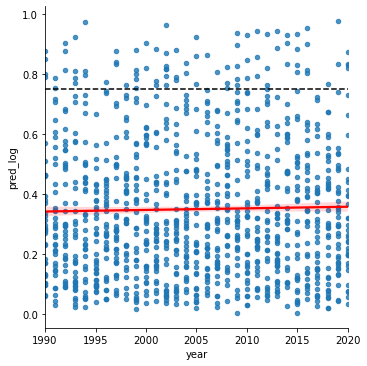

In [3]:
sns.lmplot(x="year", y="pred_log", data=df, fit_reg = True,ci = 80,scatter_kws={"s": 20,"alpha": 0.8},line_kws={"color": "red"})
plt.axhline(y = 0.75,color = "black",linestyle = "--" )
plt.show()

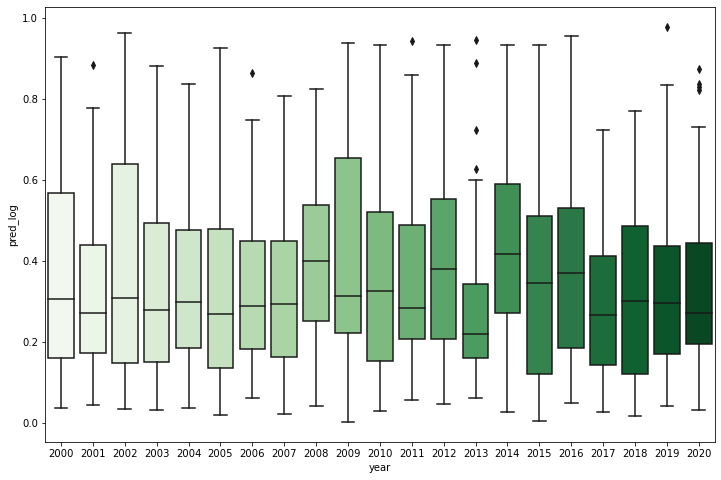

In [42]:
#box and whiskers for each year
fig = plt.figure(figsize=(12, 8))
ddf = df[df['year'] >= 2000]
sns.boxplot( x=ddf["year"], y=ddf["pred_log"], palette="Greens");
plt.show()
fig.savefig("box_general.png")

<Figure size 288x288 with 0 Axes>

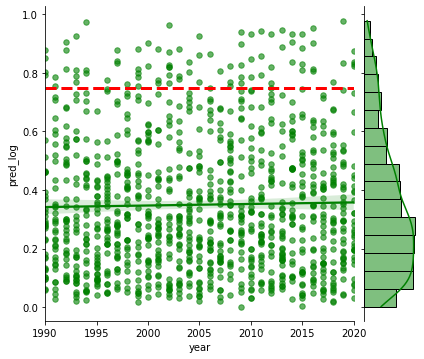

In [54]:
fig = plt.figure(figsize=(4, 4))
g = sns.jointplot(data=df, x="year", y="pred_log",kind = 'reg',color = "green",joint_kws = {'scatter_kws':dict(alpha=0.6,s=30)})
g.ax_marg_x.remove()
plt.axhline(y = 0.75,color = "red",linestyle = "--",linewidth = 3)
plt.show()
fig.savefig("reg_general.jpg")
